# Project by KAJAL NAWIK

# E-Commerce Customer Segmentation and Prediction Project
- Project background and context
    - An international e-commerce company which sells electronic products wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers.

# Step 1: Perform Exploratory Analysis on the Dataset
Exploratory Data Analysis (EDA) refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling.

Steps to Perform EDA are as follows:

- Exploratory Data Analysis (EDA): Analyze the data to understand customer purchasing patterns.
- Conduct descriptive statistics on the dataset. (count, mean, standard deviation, min, max, 25%, 50%, 75% percentile, datatype)
- Data Preprocessing: Handle missing values, normalize features, and prepare the data for modeling.
- Perform feature engineering by creating a new column. (Adjustments in the dataset for meaningful insights)
- Analyze the correlation between the data fields. (Discover relationships and dependencies between variables)
- Customer Segmentation: Use clustering techniques (e.g., K-means) to segment customers based on Recency, Frequency, and Monetary (RFM) analysis.
- Predictive Classification Model: Build a classifier to predict customer categories.
- Treat outlier (Drastically deviating factors)
- Visualization: Create an interactive dashboard/report for insights.


In [81]:
# Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [83]:
# Load the dataset and display first 5 rows
data = pd.read_csv('Downloads/E_Commerce.csv')

In [85]:
data.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [53]:
# looking for Unique values
print("Warehouse_block: ", data['Warehouse_block'].unique())
print("Mode_of_Shipment: ", data['Mode_of_Shipment'].unique())
print("Product_importance: ", data['Product_importance'].unique())

Warehouse_block:  ['D' 'F' 'A' 'B' 'C']
Mode_of_Shipment:  ['Flight' 'Ship' 'Road']
Product_importance:  ['low' 'medium' 'high']


In [8]:
# shape of the data(total number of rows and coluns)
data.shape

(10999, 12)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [14]:
# checking  the stats of data
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [16]:
# checking missing values
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [18]:
# Check for duplicates across all columns
duplicates = data[data.duplicated()]
duplicates

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [20]:
# Display the duplicates, if any
duplicates_count = duplicates.shape[0]
duplicates.head(), duplicates_count

(Empty DataFrame
 Columns: [ID, Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Product_importance, Gender, Discount_offered, Weight_in_gms, Reached.on.Time_Y.N]
 Index: [],
 0)

In [22]:
# checking the data type
data.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [24]:
# Identify categorical and continuous columns based on data types and semantics

# Categorical data: Columns with object data types or those with discrete, non-numeric values
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Continuous data: Numeric columns with meaningful ranges of values
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(categorical_columns)
print(numeric_columns)

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


In [26]:
# Adjust categorization based on semantics (e.g., "ID" is numeric but not continuous)
categorical_columns.extend(['ID'])  # Add ID to categorical as it's a unique identifier
numeric_columns.remove('ID')  # Remove ID from numeric list

In [28]:
# Continuous data columns (after removing categorical identifiers)
print(categorical_columns)
print(numeric_columns)

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'ID']
['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


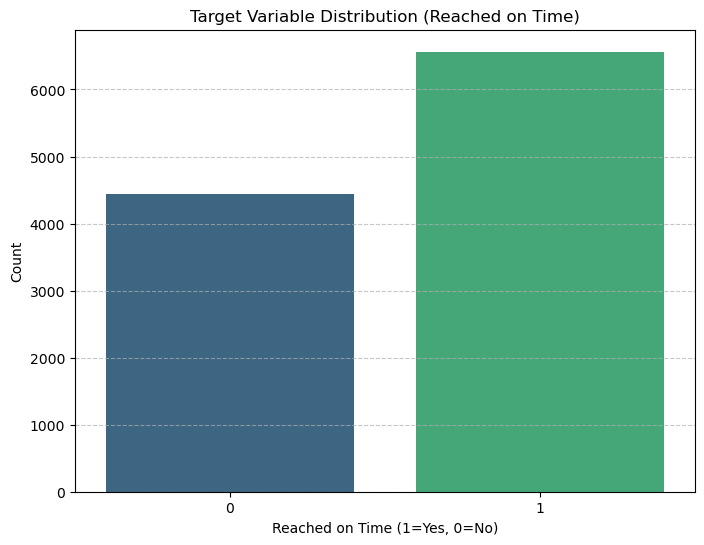

In [30]:
# visualizing the distribution of target variables
plt.figure(figsize=(8, 6))
sns.countplot(x='Reached.on.Time_Y.N', data=data, 
    palette='viridis', 
    legend=False  )
plt.title('Target Variable Distribution (Reached on Time)')
plt.xlabel('Reached on Time (1=Yes, 0=No)')
plt.ylabel('Count')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

# Observations from EDA

Summary Statistics:
   - Most customers have made around 3-4 prior purchases.
   - The discount offered ranges significantly, from as low as 1 to as high as 65.
   - The product weights range widely, with an average of ~3634 grams.
   - The target variable ("Reached on Time") is binary, with ~59.7% of deliveries arriving on time.

Missing and duplicate Values:
   - No missing & duplicate data was found in the dataset.

Target Variable Distribution:
   - The data is moderately imbalanced, with more deliveries being on time (1) compared to those that were late (0).


# Normalize numerical features and encode categorical ones.

In [87]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
label_encoders = {col: LabelEncoder().fit(data[col]) for col in categorical_columns}
data[categorical_columns] = data[categorical_columns].apply(lambda col: label_encoders[col.name].transform(col))

# Normalizing numerical columns
scaler = MinMaxScaler()
numerical_columns = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                     'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data[numerical_columns]

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,0.4,0.25,0.378505,0.125,0.671875,0.033893
1,0.4,1.00,0.560748,0.000,0.906250,0.304894
2,0.0,0.25,0.406542,0.250,0.734375,0.346676
3,0.2,0.50,0.373832,0.250,0.140625,0.025712
4,0.0,0.25,0.411215,0.125,0.703125,0.216654
...,...,...,...,...,...,...
10994,0.4,0.00,0.728972,0.375,0.000000,0.078451
10995,0.4,0.00,0.635514,0.375,0.078125,0.035939
10996,0.6,0.75,0.682243,0.375,0.046875,0.022498
10997,0.6,0.25,0.593458,0.500,0.015625,0.030533


In [38]:
# Display preprocessed data sample
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,0.4,0.25,0.378505,0.125,1,0,0.671875,0.033893,1
1,2,4,0,0.4,1.00,0.560748,0.000,1,1,0.906250,0.304894,1
2,3,0,0,0.0,0.25,0.406542,0.250,1,1,0.734375,0.346676,1
3,4,1,0,0.2,0.50,0.373832,0.250,2,1,0.140625,0.025712,1
4,5,2,0,0.0,0.25,0.411215,0.125,2,0,0.703125,0.216654,1


In [89]:
# drop the columns which are not required for analysis
data.drop(['ID','Gender'],inplace = True, axis = 1)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,0.4,0.25,0.378505,0.125,1,0.671875,0.033893,1
1,4,0,0.4,1.00,0.560748,0.000,1,0.906250,0.304894,1
2,0,0,0.0,0.25,0.406542,0.250,1,0.734375,0.346676,1
3,1,0,0.2,0.50,0.373832,0.250,2,0.140625,0.025712,1
4,2,0,0.0,0.25,0.411215,0.125,2,0.703125,0.216654,1


<Axes: >

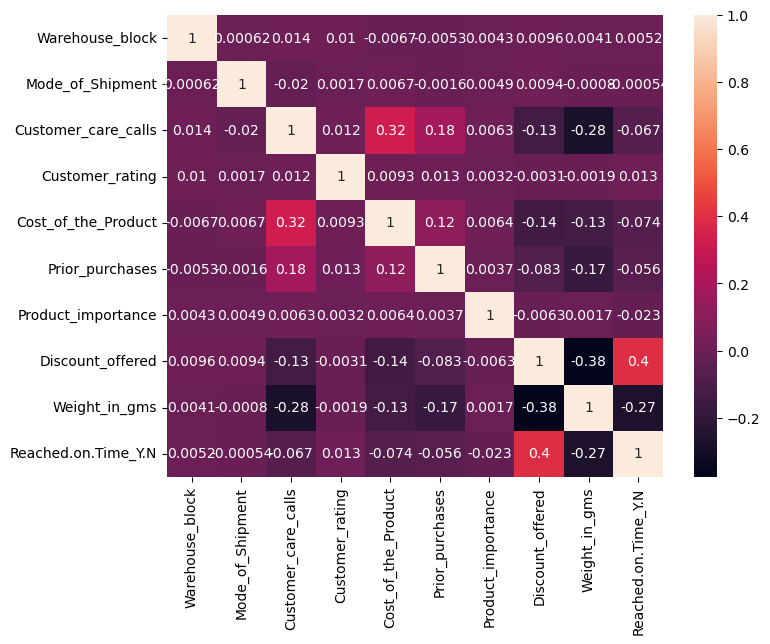

In [93]:
#checking the correlation of the different variables to check for multi-colinearity
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot=True)

As we see above, there is a high correlation b/w

- Weight_in_gms & Discount_offered       
- Weight_in_gms & Customer_care_calls
- Weight_in_gms & Reached.on.Time_Y.N       
- Weight_in_gms & Prior_purchases

In [44]:
# looking for Unique values
print("Warehouse_block: ", data['Warehouse_block'].unique())
print("Mode_of_Shipment: ", data['Mode_of_Shipment'].unique())
print("Product_importance: ", data['Product_importance'].unique())

Warehouse_block:  [3 4 0 1 2]
Mode_of_Shipment:  [0 2 1]
Product_importance:  [1 2 0]


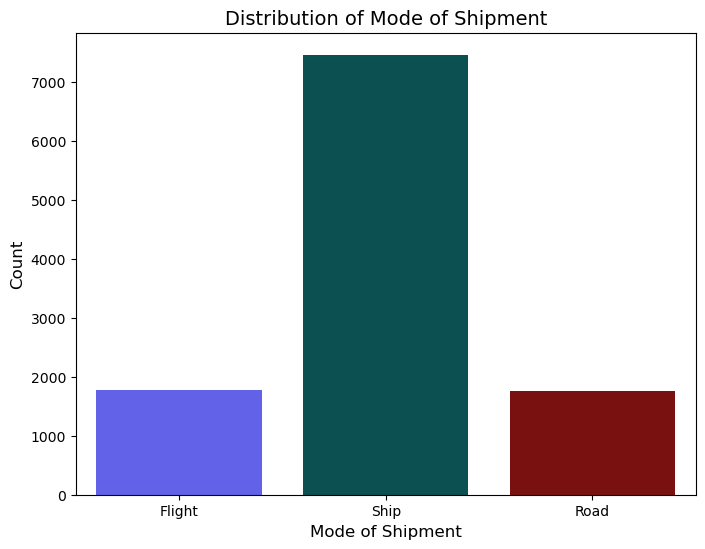

In [46]:
#Let's visualize the mode of shipments
data['Mode_of_Shipment'] = data['Mode_of_Shipment'].map({0: 'Flight', 2: 'Ship', 1: 'Road'})
plt.figure(figsize=(8, 6))
sns.countplot(x='Mode_of_Shipment', data=data, palette=['#4C4CFF', '#005C5C', '#8B0000'])
plt.title("Distribution of Mode of Shipment", fontsize=14)
plt.xlabel("Mode of Shipment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

By looking at the above bar garph we can conclude,
- The maximum shipment was made using ships, secondly for flight and the minimum mode is for road.

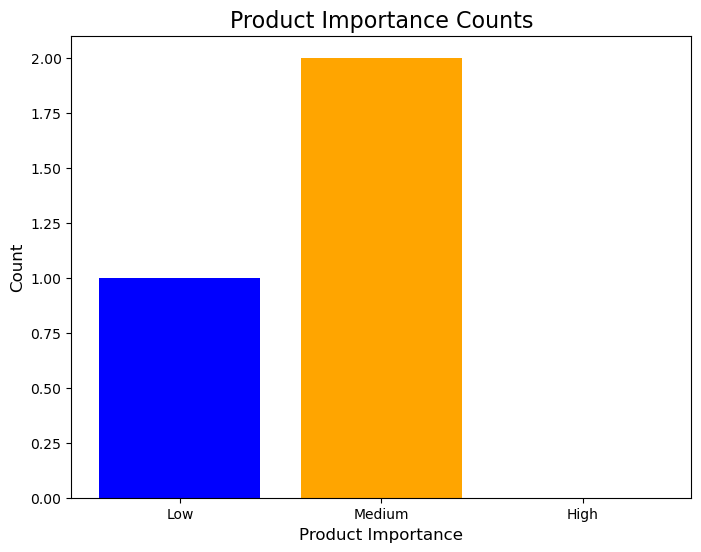

In [65]:
# Data for Product Importance
categories = ['Low', 'Medium', 'High']
counts = [1, 2, 0]

# Create the bar graph
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'orange', 'green'])
plt.title('Product Importance Counts', fontsize=16)
plt.xlabel('Product Importance', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

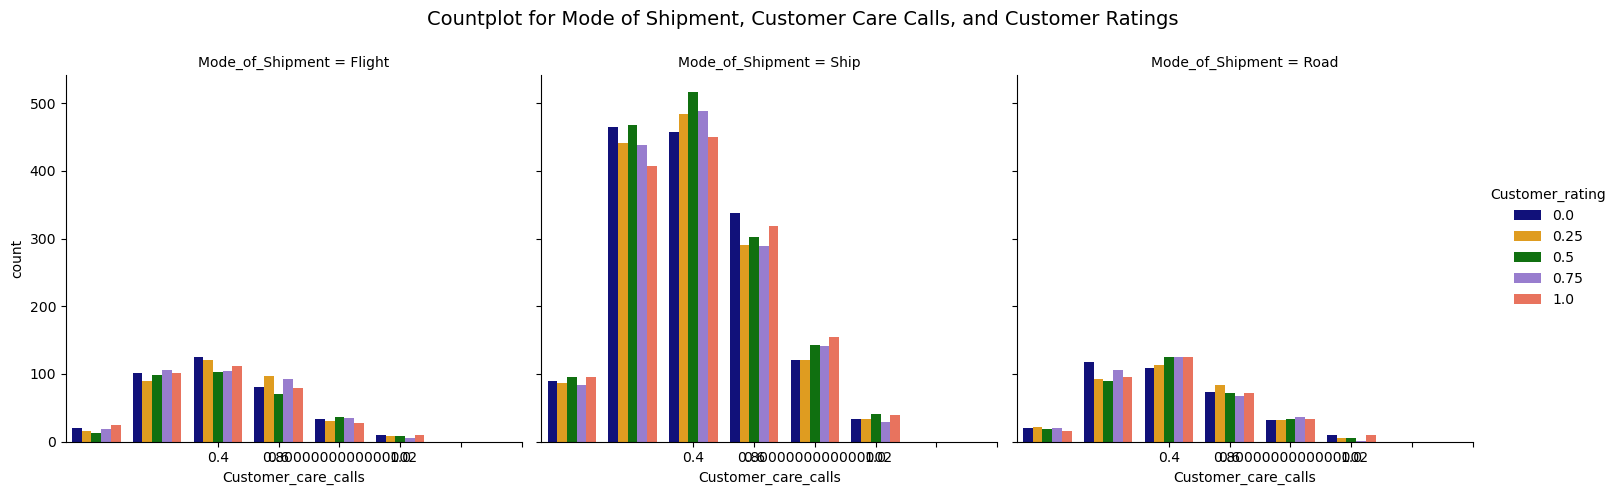

In [509]:
data['Mode_of_Shipment'] = data['Mode_of_Shipment'].map({0: 'Flight', 2: 'Ship', 1: 'Road'})
palette = ['#00008B', '#FFA500', '#008000', '#9370DB', '#FF6347']  # Dark blue, orange, green, light purple, light red
# Create a FacetGrid for Mode_of_Shipment vs Customer_care_calls and Customer_rating
g=sns.catplot(x='Customer_care_calls', hue='Customer_rating', col='Mode_of_Shipment', data=data, kind='count', palette=palette, height=5, aspect=1)
# Set the x-axis ticks for each facet
for ax in g.axes.flatten():
    ax.set_xticks([2, 3, 4, 5, 6, 7])  # Set specific x-axis ticks
# Add titles and labels
plt.subplots_adjust(top=0.85)  # Adjust space for the title
plt.suptitle("Countplot for Mode of Shipment, Customer Care Calls, and Customer Ratings", fontsize=14)
plt.show()

In [ ]:
# Map the numerical values to 'low', 'medium', and 'high' if not done already
data['Product_importance'] = data['Product_importance'].map({0: 'Low', 1: 'Medium', 2: 'High'})

# Set the color palette
palette = ['#8B0000', '#FFA500', '#228B22']  # Dark red, orange, and green for low, medium, and high

# Create a count plot for Product Importance
plt.figure(figsize=(8, 6))
sns.countplot(x='Product_importance', data=data, palette=palette)

# Add labels and title
plt.title('Distribution of Product Importance', fontsize=14)
plt.xlabel('Product Importance', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

By looking at the above bar garph we can conclude,
- The maximum count for Product importance is for medium, secondly for high and the minimum count is for low importance

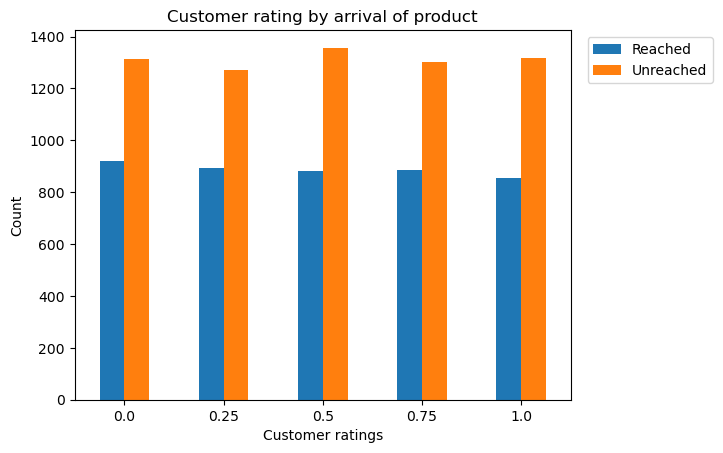

In [427]:
# let's visualize the Customer Rating against product reached on time.

ratings = data.groupby('Customer_rating')['Reached.on.Time_Y.N'].value_counts().unstack()

ratings.plot(kind='bar')

plt.legend(('Reached', 'Unreached'), bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title('Customer rating by arrival of product')
plt.xlabel('Customer ratings')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

From the below graph we can observe,
- A mix of ratings given for reached and unreached items. 
- For all the ratings the unreached counts is between 1200-1400 and the reached counts is between 800-1000
- The highest unreached items had the rating as 0.5
- The highest reached items had the rating as 0.0

<Figure size 500x500 with 0 Axes>

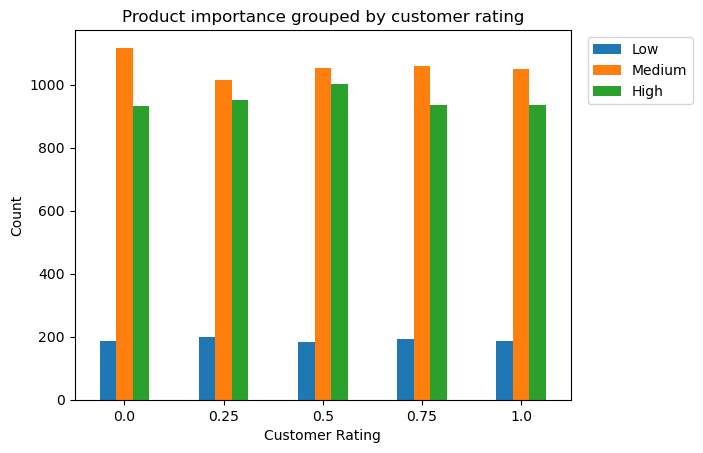

In [429]:
#Create a bar chart that shows different product importance grouped by customer ratings.

Class = data.groupby('Customer_rating')['Product_importance'].value_counts().unstack()

plt.figure(figsize=(5,5))
Class.plot(kind='bar')

plt.legend(('Low', 'Medium', 'High'), bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title('Product importance grouped by customer rating')
plt.xlabel('Customer Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

From the below graph we can observe,
- majority products with high importance are more and the rating is 0.0 
- Products with highest importance has maximum rating as 0.0
- Products with lowest importance has maximum rating as 0.75

In [15]:
#Calculate Skewness 
data_skew = data.skew()
data_skew

Warehouse_block       -0.279666
Mode_of_Shipment      -1.175214
Customer_care_calls    0.391926
Customer_rating        0.004360
Cost_of_the_Product   -0.157117
Prior_purchases        1.681897
Product_importance    -0.434112
Discount_offered       1.798929
Weight_in_gms         -0.249747
Reached.on.Time_Y.N   -0.394257
dtype: float64

What's skewness ?
Skewness is the spreadness of the Distribution

Measurement for Skewness are as follows:

- If Skewness = 0, data is perfectly symmetrical / Normally Distributed
- If Skewness is less than -1 or greater +1, distribution is highly skewed
- If Skewness is between -1 and -0.5 or between 0.5 and 1, distribution is moderately skewed
- If Skewness is between -0.5 and 0.5 then it is approximately symmetric
- In a positive skew, the tail of a distribution curve is longer on the right side. This means the outliers of the distribution curve are further out towards the right and closer to the mean on the left.

In [436]:
# for loop for identifying the skewness based on the above measurements
for i in data_skew:
    if i<-1:
        print("Highly negative Skewed: ",i)
    if i>1:
        print("Highly positive Skewed: ",i)
    if i>=-1 and i<=-0.5:
        print("Moderately negative Skewed: ",i)
    if i>=0.5 and i<=1:
        print("Moderately positive Skewed: ",i)
    if i>=-0.5 and i<=0.5:
        print("Approximately symmetric: ",i)

Approximately symmetric:  -0.27966557152853516
Approximately symmetric:  0.3919257752012444
Approximately symmetric:  0.0043595990691738555
Approximately symmetric:  -0.157117119269136
Highly positive Skewed:  1.6818973153494547
Approximately symmetric:  -0.4341124459661727
Highly positive Skewed:  1.7989291087435189
Approximately symmetric:  -0.24974675697883122
Approximately symmetric:  -0.3942573084253653


Skewness tells us the direction of outliers. For our dataset the Skewness for each entity are as follows:

- Product_importance is Moderately positive Skewed
- Prior_purchases and Discount_offered are Highly positive Skewed (check for outliers)
- Rest all the entities has Approximately symmetric distribution

In [439]:
# for loop for identifying the type of Kurtosis 
for i in data_kurtosis:
    if i<0:
        print("Platykurtic: ",i)
    if i==0:
        print("Mesokurtic: ",i)
    if i>0:
        print("Leptokurtic: ",i)

Platykurtic:  -1.36486169336351
Platykurtic:  -0.24602765949839567
Platykurtic:  -0.3093999629246209
Platykurtic:  -1.295610522309145
Platykurtic:  -0.9722638687045522
Leptokurtic:  4.003975842848255
Platykurtic:  -0.6790737784171248
Leptokurtic:  1.9991307761240318
Platykurtic:  -1.4475580704454785
Platykurtic:  -1.8446035697293088


Q. what is kurtosis?
Kurtosis is a measure of the tailedness of a distribution

The threshold for interpreting the kurtosis value depends on the context and the distribution of the data. Below are the general guidelines for interpreting the kurtosis value:

- Kurtosis < 0: 
    - It indicates a platykurtic distribution, meaning the distribution has thinner tails and is flatter compared to a normal distribution. 
    - It suggests the data has fewer outliers than a normal distribution.

- Kurtosis = 0: 
    - It indicates a mesokurtic distribution, which is similar to a normal distribution. 
    - The tails of the distribution have a similar thickness to a normal distribution.

- Kurtosis > 0: 
    - It indicates a leptokurtic distribution, meaning the distribution has heavier tails and is more peaked compared to a normal distribution. 
    - It suggests the data has more outliers and is more prone to extreme values.

For our dataset the Distributions is,
- Platykurtic distribution
    - which indicates low kurtosis(<0) which means the distribution has thinner tails and is flatter compared to a normal distribution. 
    - It suggests the data has fewer outliers than a normal distribution.
- Leptokurtic distribution
    - for "Mode_of_Shipment, Prior_purchases and Discount_offered" where it is high kurtisis(>0) which means the distribution has heavier tails and is more peaked compared to a normal distribution. 
    - It suggests the data has more outliers and is more prone to extreme values.

<Axes: >

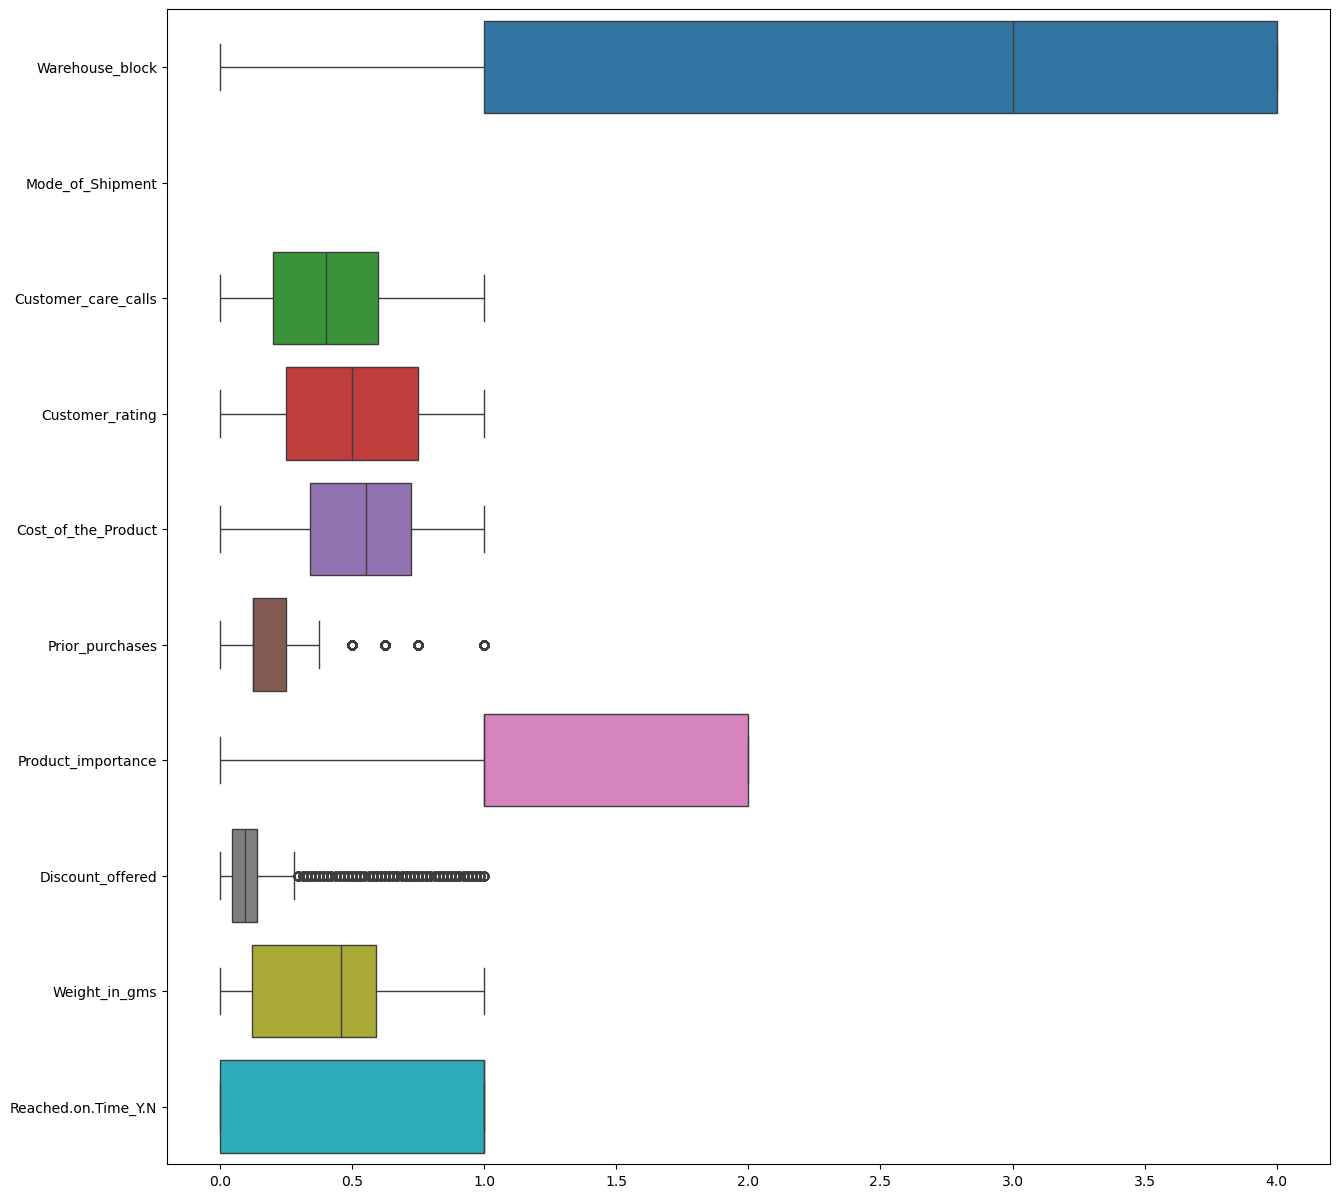

In [442]:
#Outlier Detection: Checking for any outlier via boxplot (Outlier shown with a dot, small circle or star)
fig, ax = plt.subplots(figsize=(15,15)) #Sample figsize in inches,change the number accordingly
sns.boxplot(data = data,orient = 'h',ax=ax)

From the above graphy we can say that there is outlier only in Prior_purchase and discount_offered columns. Rest other columns do not have outlier.

In [444]:
# Detecting outlier for 'Prior_purchases' column
print("Prior_purchases Column :")
print("SUMMARY : ")
print(data['Prior_purchases'].describe().round(2))

def boxplot(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = (Q3 - Q1)
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return Q1,Q3,IQR,lower_range,upper_range

Q1,Q3,IQR,lower_range,upper_range = boxplot(data.Prior_purchases)
print("BOX PLOT VALUES : ")
print("First Quartile :",Q1.round(2))
print("Second Quartile :",Q3.round(2))
print("IQR Range :",IQR.round(2))
print("Lower Range :",lower_range.round(2))
print("Upper Range :",upper_range.round(2))

Prior_purchases Column :
SUMMARY : 
count    10999.00
mean         0.20
std          0.19
min          0.00
25%          0.12
50%          0.12
75%          0.25
max          1.00
Name: Prior_purchases, dtype: float64
BOX PLOT VALUES : 
First Quartile : 0.12
Second Quartile : 0.25
IQR Range : 0.12
Lower Range : -0.06
Upper Range : 0.44


Standard Deviation: The standard deviation is 0.19, indicating some variability in the data.
Minimum Value: The lowest value in the column is 0.00.
25th Percentile (Q1): The value at the 25th percentile is 0.12.
50th Percentile (Median): The median value is 0.12, which is consistent with the lower quartile.
75th Percentile (Q3): The value at the 75th percentile is 0.25.
Maximum Value: The highest value is 1.00.

Box Plot Values:

First Quartile (Q1): 0.12
Third Quartile (Q3): 0.25
Interquartile Range (IQR): 0.12 (calculated as Q3−Q1)
Lower Range: The lower bound for detecting outliers is -0.06, which is below zero
       -indicating that negative values are not valid in this context
       -This suggests that there are no data points below the threshold for potential outliers.
Upper Range: The upper bound for detecting outliers is 0.44, indicating that any value above this is considered an outlier.

Interpretation:
the maximum value in the column is 1.00, which is well within the calculated upper range, there are no outliers in the positive range.

Practical Insight:
The column's values are generally clustered between 0.00 and 1.00, with most of the data near the lower end (0.00 to 0.25). This indicates that prior purchases are relatively low for the majority of observations. The distribution of values is relatively concentrated, with no extreme values detected as outliers.


In [448]:
# Upper and Lower Range of the dataset

upper_outlier = len(data[data.Prior_purchases > upper_range])
lower_outlier = len(data[data.Prior_purchases < lower_range])
total = len(data[(data.Prior_purchases < lower_range) | (data.Prior_purchases > upper_range)])

print("Total Range is as folows")
print("Lower Range :",lower_range.round(2))
print("Upper Range :", upper_range.round(2))
print("So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS")
print("Total Outlier ABOVE UPPER RANGE :",upper_outlier)
print("Total Outlier BELOW LOWER RANGE :",lower_outlier)
print("Total Outlier in 'Prior_purchases' Column in the Dataset :", total)

Total Range is as folows
Lower Range : -0.06
Upper Range : 0.44
So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS
Total Outlier ABOVE UPPER RANGE : 1003
Total Outlier BELOW LOWER RANGE : 0
Total Outlier in 'Prior_purchases' Column in the Dataset : 1003


Lower Range : -0.1
Upper Range : 0.4
After Outlier Treatment


<Axes: ylabel='Prior_purchases'>

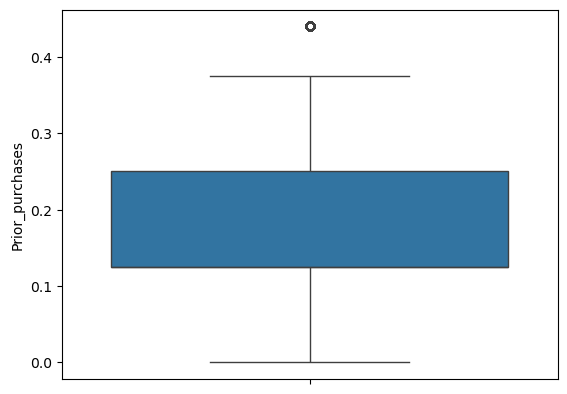

In [449]:
# Outlier Treatment 

# Replacing Value below lower range with lower range value
# AND Replacing Value above higher range with higher range value

print("Lower Range :",lower_range.round(1))
print("Upper Range :",upper_range.round(1))
data['Prior_purchases'] = np.where(data['Prior_purchases'] < -0.06, -0.06, data['Prior_purchases'])
data['Prior_purchases'] = np.where(data['Prior_purchases'] > 0.44, 0.44, data['Prior_purchases'])

print("After Outlier Treatment")
sns.boxplot(data['Prior_purchases'])

In [451]:
# Detecting outlier from 'Discount_offered' column
print("Discount_offered Column :")
print("SUMMARY : ")
print(data['Discount_offered'].describe().round(2))

def boxplot(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = (Q3 - Q1)
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return Q1,Q3,IQR,lower_range,upper_range

Q1,Q3,IQR,lower_range,upper_range = boxplot(data.Discount_offered)
print("BOX PLOT VALUES : ")
print("First Quartile :",Q1.round(2))
print("Second Quartile :",Q3.round(2))
print("IQR Range :",IQR.round(2))
print("Lower Range :",lower_range.round(2))
print("Upper Range :",upper_range.round(2))

Discount_offered Column :
SUMMARY : 
count    10999.00
mean         0.19
std          0.25
min          0.00
25%          0.05
50%          0.09
75%          0.14
max          1.00
Name: Discount_offered, dtype: float64
BOX PLOT VALUES : 
First Quartile : 0.05
Second Quartile : 0.14
IQR Range : 0.09
Lower Range : -0.09
Upper Range : 0.28


First Quartile (Q1): 5% of the data has discounts less than or equal to 5%.
Second Quartile (Median): 50% of the data has discounts less than or equal to 14%.
Third Quartile (Q3): 75% of the data has discounts less than or equal to 14%.
Interquartile Range (IQR):

The IQR, which measures the middle 50% of the data, is 9% (0.14 - 0.05).
Outlier Detection:

Using the standard method for outliers, the lower range is calculated as Q1−1.5×IQR, resulting in -0.09. Since discounts cannot be negative, no data lies below this range.

In [455]:
# Upper and Lower Range of the dataset

upper_outlier = len(data[data.Discount_offered > upper_range])
lower_outlier = len(data[data.Discount_offered < lower_range])
total = len(data[(data.Discount_offered < lower_range) | (data.Discount_offered > upper_range)])

print("Total Range is as folows")
print("Lower Range :",lower_range.round(2))
print("Upper Range :", upper_range.round(2))
print("So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS")
print("Total Outlier ABOVE UPPER RANGE :",upper_outlier)
print("Total Outlier BELOW LOWER RANGE :",lower_outlier)
print("Total Outlier in 'Discount_offered' Column in the Dataset :", total)

Total Range is as folows
Lower Range : -0.09
Upper Range : 0.28
So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS
Total Outlier ABOVE UPPER RANGE : 2209
Total Outlier BELOW LOWER RANGE : 0
Total Outlier in 'Discount_offered' Column in the Dataset : 2209


Lower Range : -0.1
Upper Range : 0.3
After Outlier Treatment


<Axes: ylabel='Discount_offered'>

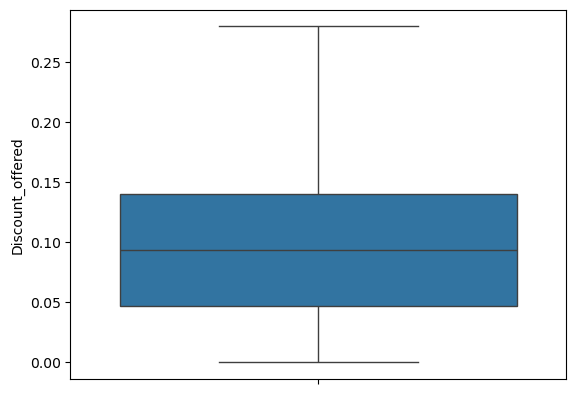

In [457]:
# Outlier Treatment 

# Replacing Value below lower range with lower range value
# AND Replacing Value above higher range with higher range value

print("Lower Range :",lower_range.round(1))
print("Upper Range :",upper_range.round(1))
data['Discount_offered'] = np.where(data['Discount_offered'] < -0.09, -0.09, data['Discount_offered'])
data['Discount_offered'] = np.where(data['Discount_offered'] > 0.28, 0.28, data['Discount_offered'])

print("After Outlier Treatment")
sns.boxplot(data['Discount_offered'])

In [459]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      10999 non-null  int32  
 1   Mode_of_Shipment     0 non-null      object 
 2   Customer_care_calls  10999 non-null  float64
 3   Customer_rating      10999 non-null  float64
 4   Cost_of_the_Product  10999 non-null  float64
 5   Prior_purchases      10999 non-null  float64
 6   Product_importance   10999 non-null  int32  
 7   Discount_offered     10999 non-null  float64
 8   Weight_in_gms        10999 non-null  float64
 9   Reached.on.Time_Y.N  10999 non-null  int64  
dtypes: float64(6), int32(2), int64(1), object(1)
memory usage: 773.5+ KB


In [461]:
#Let's check again Skewness and kurtosis after the outlier being treated

data.skew()

Warehouse_block       -0.279666
Mode_of_Shipment            NaN
Customer_care_calls    0.391926
Customer_rating         0.00436
Cost_of_the_Product   -0.157117
Prior_purchases        0.423439
Product_importance    -0.434112
Discount_offered       0.706646
Weight_in_gms         -0.249747
Reached.on.Time_Y.N   -0.394257
dtype: object

In [463]:
data.kurtosis()

Warehouse_block       -1.364937
Mode_of_Shipment            NaN
Customer_care_calls   -0.308995
Customer_rating       -1.295654
Cost_of_the_Product    -0.97216
Prior_purchases       -0.936101
Product_importance    -0.678837
Discount_offered      -0.822848
Weight_in_gms         -1.447671
Reached.on.Time_Y.N   -1.844897
dtype: object

- Most features exhibit mild skewness, suggesting near-normal distribution
- Most variables exhibit left skewness, reflecting concentration toward higher values for categorical and numerical features alike.
- Mode_of_Shipment stands out with a skewness close to zero, indicating successful transformation.

# Customer Segmentation

In [ ]:
# Determine the Optimal Number of Clusters

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [25]:
# Selecting RFM-related features for clustering
rfm_features = ['Customer_care_calls', 'Prior_purchases', 'Discount_offered']

In [27]:
# Using the elbow method to determine the optimal number of clusters
inertia = []
silhouette_scores = []
k_range = range(2, 11)

In [29]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[rfm_features])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data[rfm_features], kmeans.labels_))

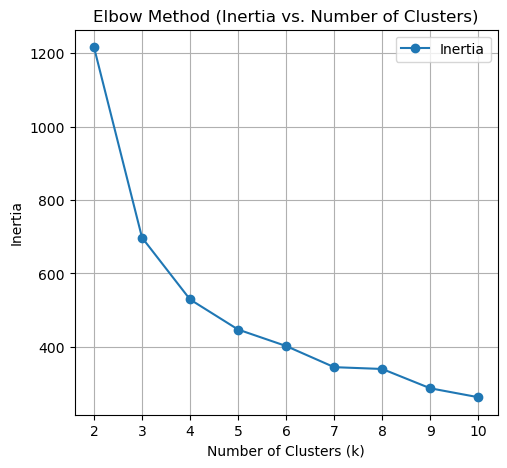

In [31]:
 # Plotting inertia 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', label='Inertia')
plt.title('Elbow Method (Inertia vs. Number of Clusters)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.legend()

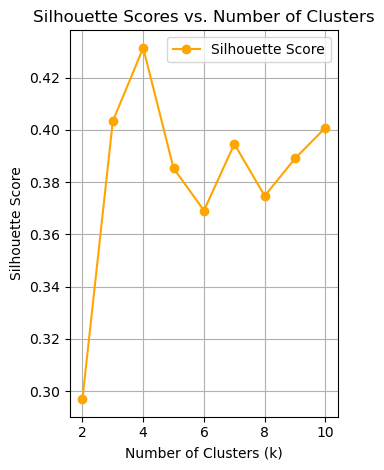

In [33]:
# Plotting silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score', color='orange')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

- In both, Elbow method and siihouette score, the number of cluster is 4

# Apply K-Means Clustering

In [37]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Customer_Segment'] = kmeans.fit_predict(data[rfm_features])

In [39]:
# Add the cluster labels to the dataset
cluster_centers = kmeans.cluster_centers_

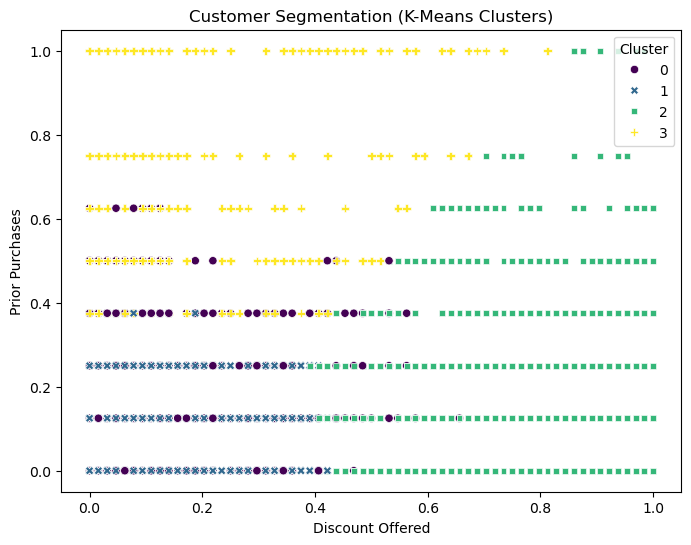

In [43]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['Discount_offered'],
    y=data['Prior_purchases'],
    hue=data['Customer_Segment'],
    palette='viridis',
    style=data['Customer_Segment'],
)
plt.title('Customer Segmentation (K-Means Clusters)')
plt.xlabel('Discount Offered')
plt.ylabel('Prior Purchases')
plt.legend(title='Cluster')
plt.show()

# Analyze Customer Segment

In [47]:
# Analyze the clusters
segment_analysis = data.groupby('Customer_Segment')[rfm_features].mean()

In [49]:
print("Customer Segment Analysis:")
print(segment_analysis)

Customer Segment Analysis:
                  Customer_care_calls  Prior_purchases  Discount_offered
Customer_Segment                                                        
0                            0.697226         0.222514          0.087439
1                            0.273420         0.105642          0.092675
2                            0.342890         0.144263          0.722353
3                            0.379118         0.553944          0.101351


Inferences
- Segment 0 and Segment 1 represent less engaged customers, with Segment 0 contacting customer care more frequently.
- Segment 2 appears highly price-sensitive, heavily influenced by discounts despite moderate engagement.
- Segment 3 consists of loyal and frequent purchasers, showing potential for sustained revenue with minimal discounts.

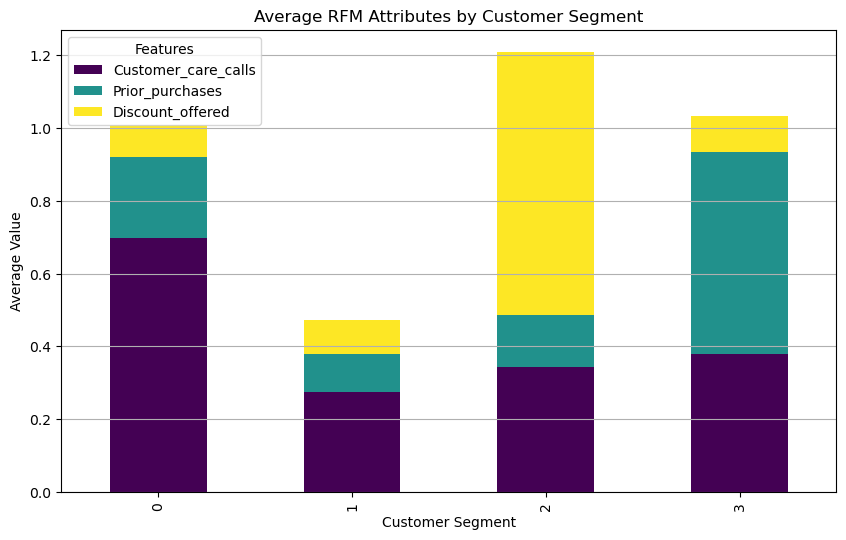

In [57]:
# Visualize the average RFM attributes per cluster
segment_analysis.plot(kind='bar', figsize=(10, 6), stacked=True, colormap='viridis')
plt.title('Average RFM Attributes by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Value')
plt.legend(title='Features')
plt.grid(axis='y')
plt.show()

- Discounts (Discount_offered) play a significant role for Segment 2, indicating a group of customers heavily influenced by promotional offers.
- Segment 0 appears to be the most engaged across all attributes, potentially representing loyal or high-value customers.
- Segment 1 shows the lowest average values, indicating less engagement across all features, possibly representing inactive or less frequent customers.
- The variation in feature dominance highlights distinct behavioral patterns among the customer segments, enabling targeted marketing strategies for each group.

# DBSCAN Clustering

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [106]:
# Select relevant festures
features = data[['Customer_care_calls','Prior_purchases','Discount_offered']]

In [108]:
# Normalize features
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()

In [63]:
scaled_features = scaler.fit_transform(features)

In [116]:
# DBSCAN Clustering
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
dbscan_labels = dbscan.fit_predict(scaled_features)
data['DBSCAN_Cluster'] = dbscan_labels

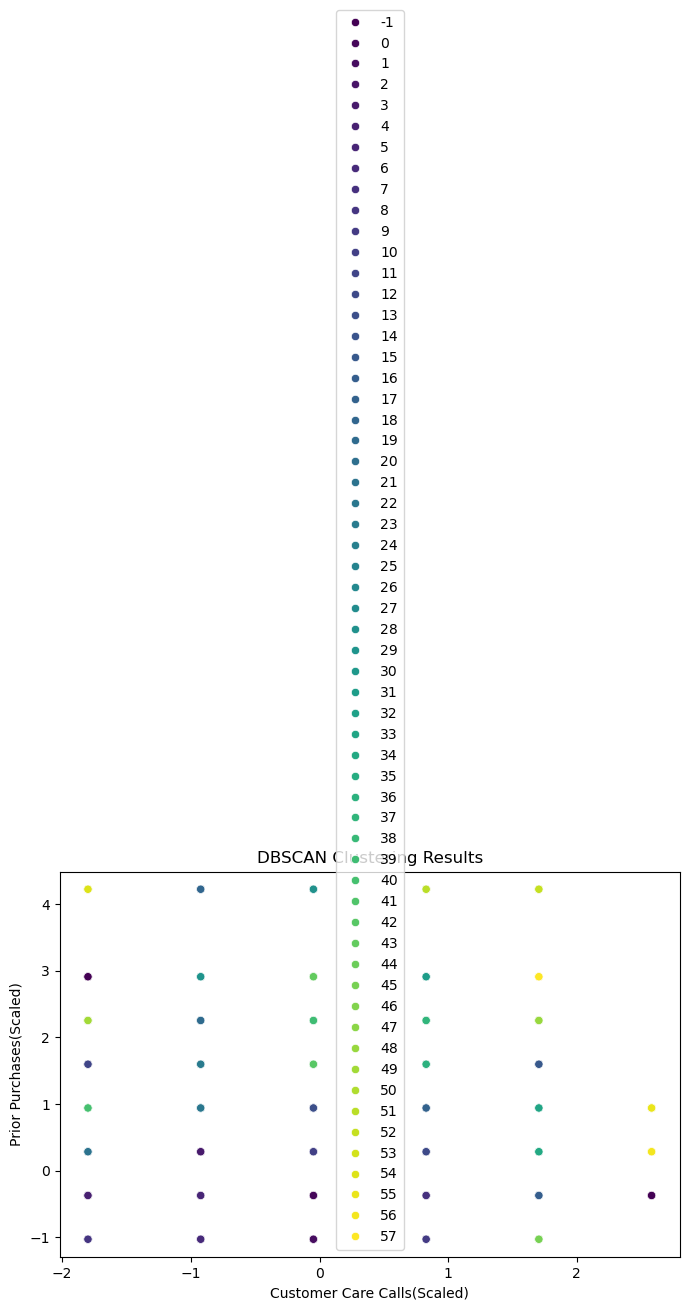

In [118]:
# Visualize DBSCAN Result
plt.figure(figsize=(8,5))
sns.scatterplot(x=scaled_features[:,0],
            y = scaled_features[:,1],
               hue = dbscan_labels,
               palette = 'viridis',
               legend = 'full')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Customer Care Calls(Scaled)')
plt.ylabel('Prior Purchases(Scaled)')
plt.show()

Key Observations:
- DBSCAN clusters are formed based on density, meaning groups of points closely packed together are categorized as the same cluster.
- Sparse regions or outliers are labeled as a separate category, often represented with a unique color or label (e.g., -1 for noise).
- The results show distinct groupings, suggesting clear separations in the data structure based on the scaled features Customer Care Calls and Prior Purchases.

In [70]:
# Step 2: Hierarchical Clustering (Agglomerative)
# Generate the linkage matrix
linked = linkage(scaled_features, method='ward')

In [71]:
# Ensure matplotlib plots inline
%matplotlib inline

# Generate sample data
data = np.random.rand(10, 2)

# Perform hierarchical clustering
linked = linkage(data, method='ward')

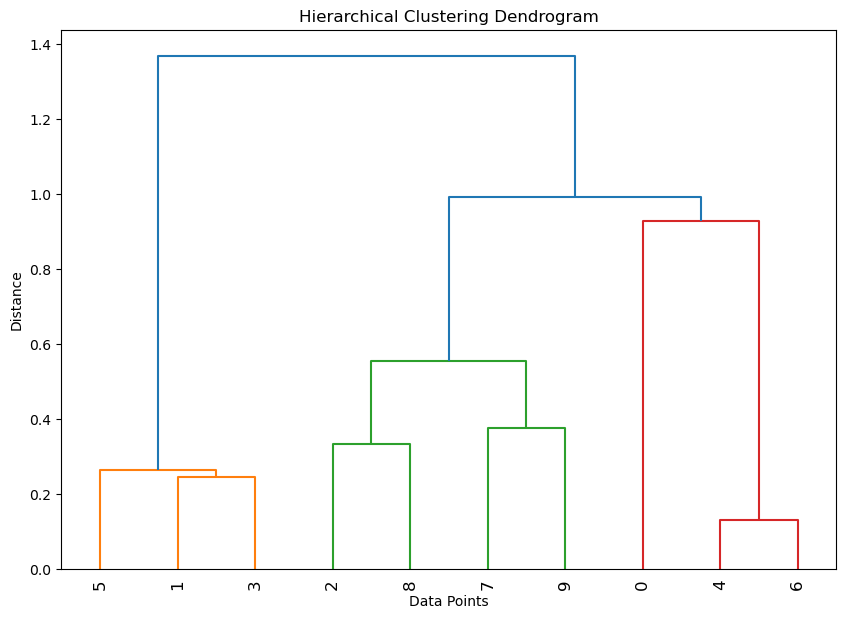

In [145]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.xticks(rotation=90)  
plt.show()

Key Observations:
- The x-axis shows individual data points or small clusters, while the y-axis represents the linkage distance between them.
- The height of the vertical lines indicates the dissimilarity between clusters; longer lines suggest greater dissimilarity.
- This dendrogram provides insight into the optimal number of clusters, typically determined by cutting the tree at a specific height to form cohesive groups.

In [147]:
# Apply Agglomerative Clustering with optimal clusters determined from the dendrogram
hierarchical = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_features)

# Assign cluster labels to the data
data['Hierarchical_Cluster'] = hierarchical_labels

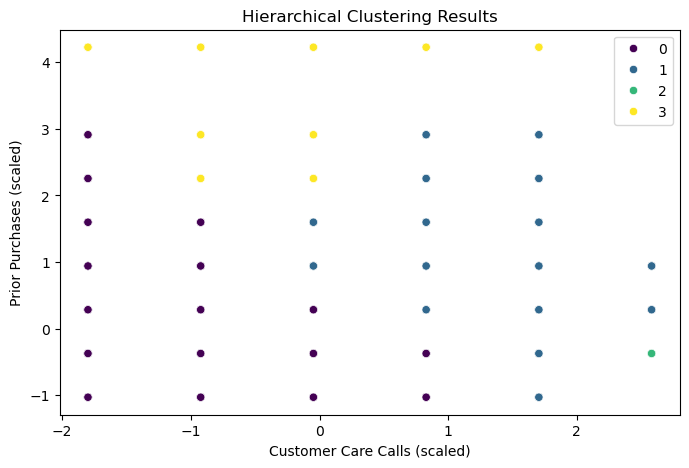

In [148]:
# Visualize Hierarchical Clustering Results
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=scaled_features[:, 0], 
    y=scaled_features[:, 1], 
    hue=hierarchical_labels, 
    palette='viridis', 
    legend='full'
)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Customer Care Calls (scaled)')
plt.ylabel('Prior Purchases (scaled)')
plt.show()

Key Observations:
- The hierarchical clustering successfully segments the data into distinct clusters.
- Unlike DBSCAN, which forms clusters based on density, hierarchical clustering creates clusters based on proximity and agglomerative linkages.

Comparison and Summary:

DBSCAN:

- Handles outliers effectively by assigning them to a noise cluster.
- Relies on density parameters (epsilon and min_samples), which influence cluster formation.
- Works well with irregularly shaped clusters.

Hierarchical Clustering:

- Provides a visual dendrogram to aid in determining the number of clusters.
- Groups data in a top-down (divisive) or bottom-up (agglomerative) approach.
- May struggle with scalability and outliers compared to DBSCAN.

In [150]:
# Return a summary of the clusters
data[['Customer_care_calls', 'Prior_purchases', 'Discount_offered', 'DBSCAN_Cluster', 'Hierarchical_Cluster']].head()

,Customer_care_calls,Prior_purchases,Discount_offered,DBSCAN_Cluster,Hierarchical_Cluster
0,0.4,0.125,0.671875,0,2
1,0.4,0.000,0.906250,1,2
2,0.0,0.250,0.734375,2,2
3,0.2,0.250,0.140625,3,0
4,0.0,0.125,0.703125,4,2


Observations
DBSCAN Clusters:

   - Each row has a unique cluster label (from 0 to 4 in this subset).
   - DBSCAN assigns distinct clusters, reflecting its density-based clustering approach.

Hierarchical Clusters:

   - Only two cluster labels (0 and 2) are visible in the data.
   - Hierarchical clustering seems to group data points differently compared to DBSCAN.

Differences Between Clustering Methods:

   - The two methods classify the same data differently, likely due to the differences in their algorithms (density-based vs. hierarchical).

Feature Relationships:

   - Data points with similar normalized features (e.g., Discount_offered) may share cluster labels, but not consistently across the two methods.

# Model Predcition

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [117]:
# set the target variable
target_column = 'Reached.on.Time_Y.N' 
X = data.drop(columns=[target_column])
y = data[target_column]

In [95]:
# importing counter class from collections module to check the number of 1 and 0 in the output variable

from collections import Counter
counter = Counter(y)
print(counter)

Counter({1: 6563, 0: 4436})


Text(0.5, 0, 'Electronic Item (0==Reached)')

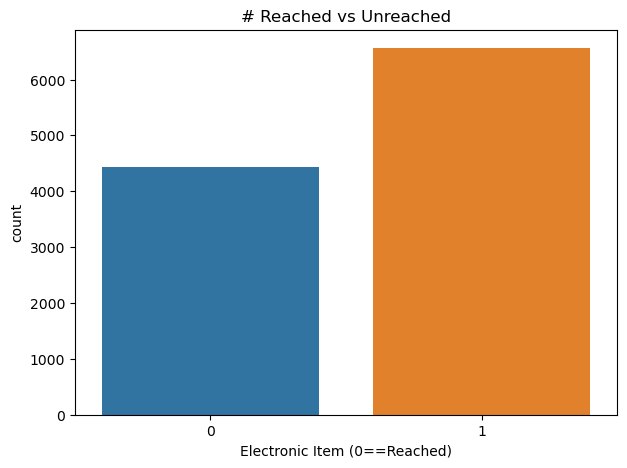

In [99]:
#Using Bar graph let's visualize the counts of output

f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x=y, data=data, palette=['#1f77b4', '#ff7f0e']) #X means input and y is my desired output
plt.title('# Reached vs Unreached')
plt.xlabel('Electronic Item (0==Reached)')

In [121]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
y_pred_logistic

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
y_pred_tree 

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [25]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [33]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_svm

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

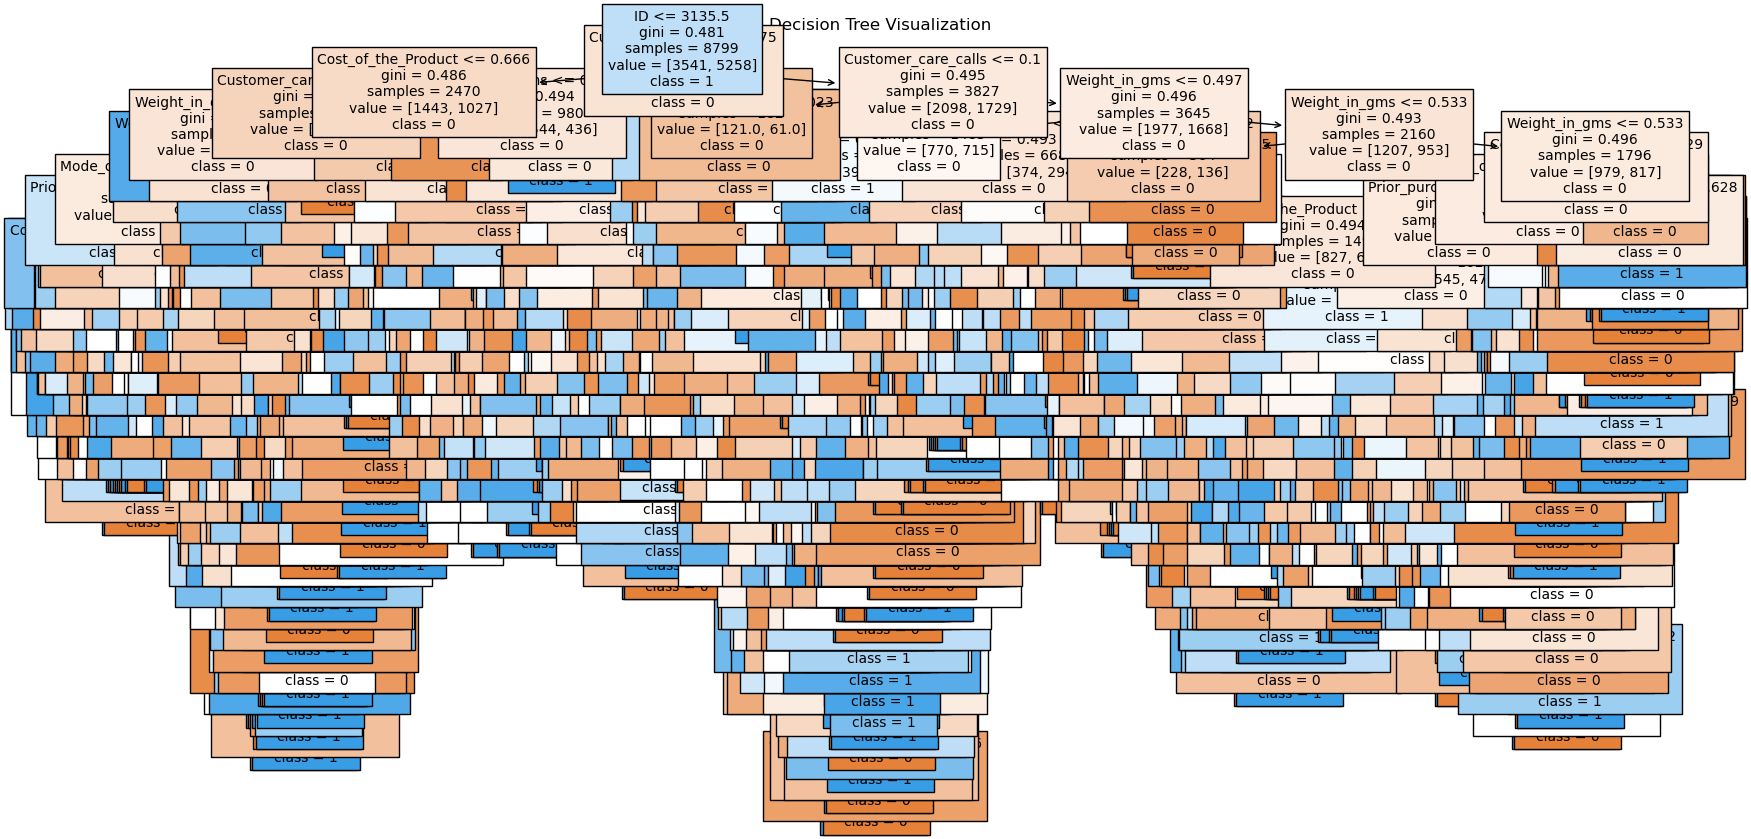

In [105]:
# Visualization of Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=[str(cls) for cls in tree_model.classes_],  # Convert classes to strings
    filled=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


Logistic Regression:


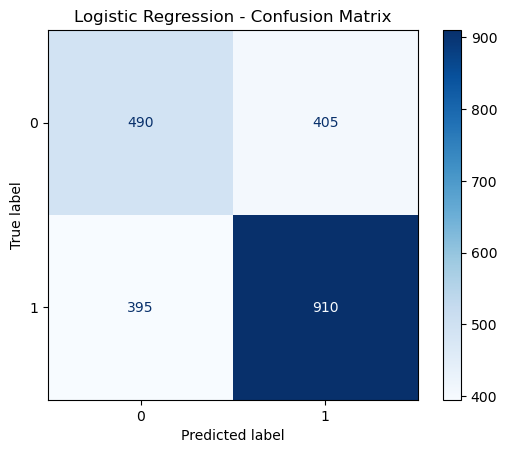

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       895
           1       0.69      0.70      0.69      1305

    accuracy                           0.64      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200



In [37]:
# Logistic Regression
print("\nLogistic Regression:")
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=np.unique(y_test))
disp_logistic.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))


Decision Tree:


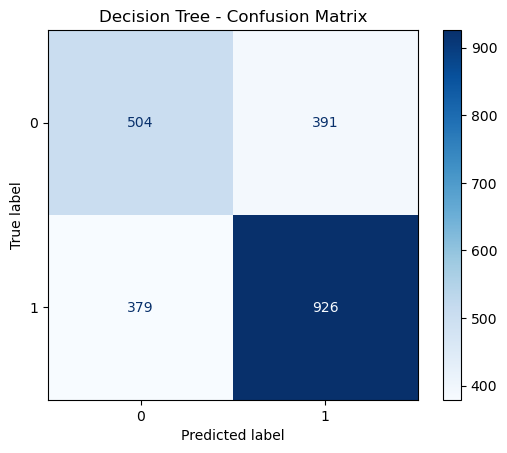

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.56      0.57       895
           1       0.70      0.71      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



In [39]:
# Decision Tree
print("\nDecision Tree:")
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=np.unique(y_test))
disp_tree.plot(cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))


Random Forest:


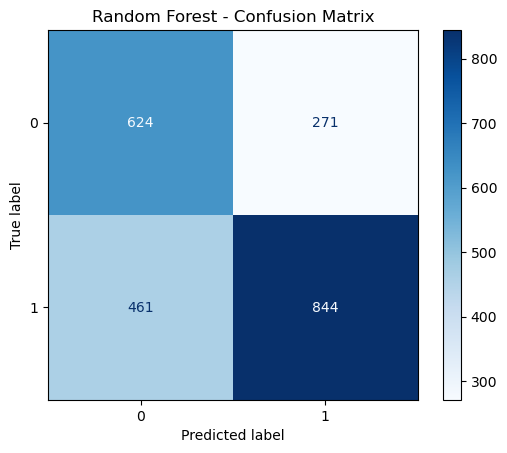

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.70      0.63       895
           1       0.76      0.65      0.70      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.67      0.66      2200
weighted avg       0.68      0.67      0.67      2200



In [41]:
# Random Forest
print("\nRandom Forest:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=np.unique(y_test))
disp_rf.plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Support Vector Machine:


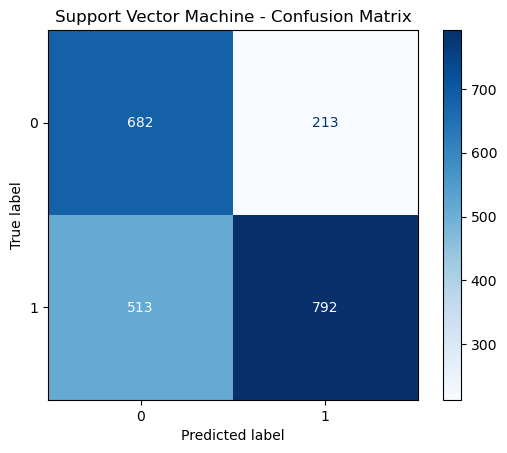

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.76      0.65       895
           1       0.79      0.61      0.69      1305

    accuracy                           0.67      2200
   macro avg       0.68      0.68      0.67      2200
weighted avg       0.70      0.67      0.67      2200



In [43]:
# Support Vector Machine
print("\nSupport Vector Machine:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=np.unique(y_test))
disp_svm.plot(cmap='Blues')
plt.title("Support Vector Machine - Confusion Matrix")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))